In [1]:
import sys
sys.path.insert(0, '../../../network')
sys.path.insert(0, '../../../figures')
from sequences import GaussianSequence
from transfer_functions import ErrorFunction
import color_scheme as cs
import plot_utils as pu

In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = np.load("data/data.npy", allow_pickle=True) 
M, overlaps, correlations, state, \
M2, overlaps2, correlations2, state2, \
phi_xi = data

Transfer function

In [4]:
phi = ErrorFunction(mu=0.22, sigma=0.1).phi

Step-function input

In [5]:
dt = 1e-3
Delta_t = 10e-3
T = 300
P = 16
S = 1
N = 40000
p_input = np.zeros((T,N))
sequences = [GaussianSequence(P, N, seed=i) for i in range(P)]
patterns = np.stack([s.inputs for s in sequences])
rng = np.random.RandomState(seed=5)
for n in range(160-1):
    p_input[n,:] = patterns[0,int(n/int(Delta_t/dt)),:]

In [6]:
t_max = overlaps[-1,:].argmax()
lambda_ = 0.2
t = np.rint(np.linspace(0,range(overlaps.shape[1])[t_max], overlaps.shape[0]))
a = np.mean((state[:,t.astype(int)] - phi_xi[0].T)**2, axis=1)
b = lambda_*state.var(axis=1)
c = np.zeros(state.shape[0])
for i, row in enumerate(state):
    d = np.histogram(row, bins=100)[0].astype(float)
    d += np.finfo(float).eps
    d /= d.sum()
    c[i] = -np.nansum(np.log2(d)*d)
idxs = np.argsort(a - lambda_*c)
n_idx, t_max = idxs[11], overlaps[-1, :].argmax()

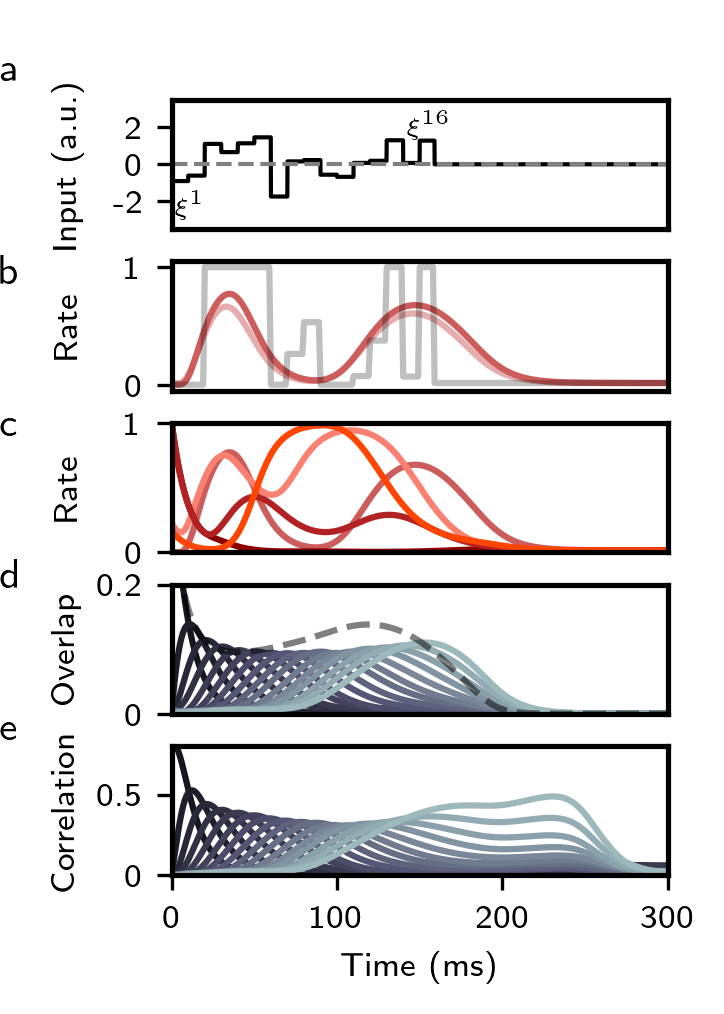

In [58]:
pu.figure_setup()
#fig_size = pu.get_fig_size(6,8.7)
fig_size = pu.get_fig_size(6,8.7)
fig, ax = plt.subplots(5,1, figsize=fig_size, dpi=300)

ax[0].annotate("a", xy=(0.00,0.92), xycoords='figure fraction', fontsize=10)
ax[1].annotate("b", xy=(0.00,0.72), xycoords='figure fraction', fontsize=10)
ax[1].annotate("c", xy=(0.00,0.57), xycoords='figure fraction', fontsize=10)
ax[1].annotate("d", xy=(0.00,0.42), xycoords='figure fraction', fontsize=10)
ax[1].annotate("e", xy=(0.00,0.27), xycoords='figure fraction', fontsize=10)

# Panel a
ax[0].plot(np.arange(0,T,0.1), np.repeat(p_input[:,n_idx],10), color='k', linewidth=1); 
ax[0].axhline(0, linestyle='dashed', color='grey', linewidth=1)
ax[0].set_xlim([0,300])
ax[0].set_yticks([-2,0,2])
ax[0].set_yticklabels([-2,0,2])
ax[0].set_ylim([-2.5,2.5])
ax[0].annotate(r"$\xi^1$", xy=(2,-2.75), xycoords='data', fontsize=6)
ax[0].annotate(r"$\xi^{16}$", xy=(142,1.60), xycoords='data', fontsize=6)

# Panel b
ax[1].plot(state[n_idx], color=cs.single_unit_colors()[0])
ax[1].plot(state2[n_idx], linestyle='solid', alpha=0.5, color=cs.single_unit_colors()[0])
ax[1].plot(phi(p_input[:,n_idx]), color='k', alpha=0.25)
ax[1].set_ylim([-0.05,1.05]);
ax[1].set_xlim([0,300]);
ax[1].set_yticks([0,1])
ax[1].set_yticklabels([0,1])

# Panel c
unit_idxs = [n_idx]+list(range(10, 14))
colors = cs.single_unit_colors()
for i, color in zip(unit_idxs, itertools.cycle(colors)):
    ax[2].plot(state[i], color=color)
ax[2].set_ylim([0,1]);
ax[2].set_xlim([0,300]);
ax[2].set_yticks([0,1])
ax[2].set_yticklabels([0,1])

# Panel d
for overlap, color in zip(overlaps, cs.overlap_colors(len(overlaps))):
    ax[3].plot(overlap, color=color)
ax[3].plot(M, color='k', alpha=0.5, linestyle='dashed')
ax[3].set_ylim([0,0.2]);
ax[3].set_xlim([0,300]);
ax[3].set_yticks([0,0.2])
ax[3].set_yticklabels([0,0.2])

# Panel e
for overlap, color in zip(correlations, cs.overlap_colors(len(correlations))):
    ax[4].plot(overlap, color=color)
ax[4].set_ylim([0,0.8]);
ax[4].set_xlim([0,300]);
ax[4].set_yticks([0,0.5])
ax[4].set_yticklabels([0,0.5])
ax[4].set_xticks([0,100,200,300])
ax[4].set_xticklabels([0,100,200,300])

for i in range(4):
    ax[i].set_xticks([]);
plt.subplots_adjust(hspace=0.25, wspace=0.35)
ax[4].set_xlabel("Time (ms)") 

ax[0].set_ylabel("Input (a.u.)", labelpad=7)
ax[1].set_ylabel("Rate", labelpad=10);
ax[2].set_ylabel("Rate", labelpad=10);
ax[3].set_ylabel("Overlap");
ax[4].set_ylabel("Correlation");

ax[4].set_xticks([0,100,200,300])
ax[0].set_yticks([-2,0,2]);
ax[0].set_ylim([-3.5,3.5]);

plt.subplots_adjust(left=0.20)
plt.savefig("../output/1.pdf", bbox_inches='tight', dpi=300)